# Project on Customer Segmentation: Exploring Clustering Techniques

## Objective

Customer Analysis and Segmentation involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a Customer Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.

## Dataset Description

The Dataset was taken from Kaggle (link: https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering). It consists of 29 features(columns) and 2240 data points(rows). A detailed description of all the features is given below.
* **Id**: Unique identifier for each individual in the dataset.
* **Year_Birth**: The birth year of the individual.
* **Education**: The highest level of education attained by the individual.
* **Marital_Status**: The marital status of the individual.
* **Income**: The annual income of the individual.
* **Kidhome**: The number of young children in the household.
* **Teenhome**: The number of teenagers in the household.
* **Dt_Customer**: The date when the customer was first enrolled or became a part of the company's database.
* **Recency**: The number of days since the last purchase or interaction.
* **MntWines**: The amount spent on wines.
* **MntFruits**: The amount spent on fruits.
* **MntMeatProducts**: The amount spent on meat products.
* **MntFishProducts**: The amount spent on fish products.
* **MntSweetProducts**: The amount spent on sweet products.
* **MntGoldProds**: The amount spent on gold products.
* **NumDealsPurchases**: The number of purchases made with a discount or as part of a deal.
* **NumWebPurchases**: The number of purchases made through the company's website.
* **NumCatalogPurchases**: The number of purchases made through catalogs.
* **NumStorePurchases**: The number of purchases made in physical stores.
* **NumWebVisitsMonth**: The number of visits to the company's website in a month.
* **AcceptedCmp3**: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
* **AcceptedCmp4**: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
* **AcceptedCmp5**: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
* **AcceptedCmp1**: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
* **AcceptedCmp2**: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
* **Complain**: Binary indicator (1 or 0) whether the individual has made a complaint.
* **Z_CostContact**: A constant cost associated with contacting a customer.
* **Z_Revenue**: A constant revenue associated with a successful campaign response.
* **Response**: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

## Exploratory Data Analysis (EDA)

In [2]:
# Importing the necessary libraries for carrying out EDA and K-Means Clustering
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np


In [3]:
# Reading the csv file
df = pd.read_csv("customer1.csv")

In [4]:
# Displaying the first five data points
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Calculating the number of missing values in each column
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**OBSERVATION-1**: We can see that the 'Income' column has 24 missing values. We need to handle these missing values. We can either choose to remove these data points that contain the missing values, or replace the missing values with the mean/mode of the available points in each column. We chose the latter method in this case.

In [7]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [8]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [10]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [11]:
# Adding an 'Age' column to represent the current age of the customer
from datetime import datetime

df['Age'] = datetime.now().year - df['Year_Birth']

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43


In [13]:
# Adding a 'Spent' column to calculate the total amount a customer spent
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,422


In [15]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,67,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,70,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,59,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,40,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,43,422,1


In [17]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196,605.798214,0.950446
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288,0.751803
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,5.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,68.750000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,396.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000,1045.500000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000,2525.000000,3.000000


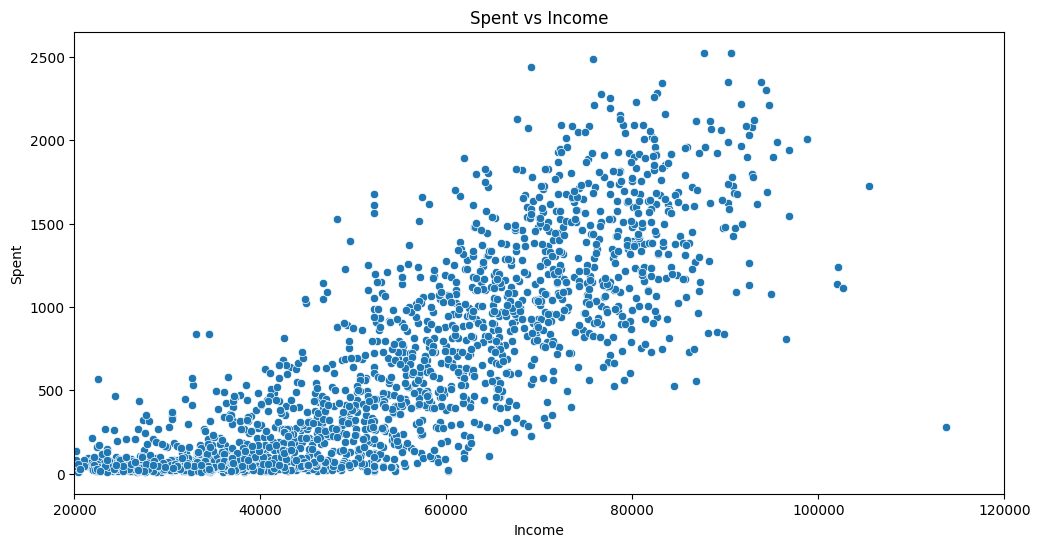


Correlation between Income and Spent: 0.664706497527333


In [18]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'Spent')
plt.xlim(20000, 120000)
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Income and Spent: {df['Income'].corr(df['Spent'])}")

In [19]:
df.drop(columns={'Dt_Customer'}, axis=1, inplace=True)

In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,67,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,70,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,59,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,40,53,1
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,43,422,1


In [21]:
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])


In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,67,1617,0
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,70,27,2
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,59,776,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,40,53,1
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,43,422,1


In [23]:
df1 = df.copy()

In [24]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [25]:
scaled_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children
0,-0.020999,-0.985345,-0.350141,0.251004,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846,0.985345,1.679417,-1.264505
1,-1.053058,-1.235733,-0.350141,0.251004,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1.235733,-0.961275,1.396361
2,-0.447070,-0.317643,-0.350141,1.180340,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.317643,0.282673,-1.264505
3,0.181716,1.268149,-0.350141,1.180340,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-1.268149,-0.918094,0.065928
4,-0.082614,1.017761,1.428354,-0.678332,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-1.017761,-0.305254,0.065928


In [26]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 42, svd_solver = 'full')
pca.fit(scaled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [27]:
d

22

In [28]:
cumsum

array([0.2687128 , 0.36328723, 0.43039812, 0.48910702, 0.53323578,
       0.57140073, 0.60788519, 0.64362833, 0.67809904, 0.7118221 ,
       0.74400773, 0.77318665, 0.79869424, 0.82134442, 0.84251003,
       0.86349192, 0.88290699, 0.90155623, 0.91777564, 0.93282852,
       0.94749714, 0.96101502, 0.97339373, 0.98415539, 0.99270876,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [29]:
cumsum[21]

0.9610150210508661

In [30]:
cumsum[19]

0.9328285195552007

In [31]:
cumsum[20]

0.9474971390668913

In [32]:
pca = PCA(n_components = 19, random_state = 42, svd_solver = 'full')
pca.fit(scaled_df)
df1_reduced = pd.DataFrame(pca.transform(scaled_df), columns = (['col1', 'col2', 'col3', 'col4',
                                                                  'col5', 'col6', 'col7', 'col8',
                                                                  'col9', 'col10', 'col11', 'col12',
                                                                  'col13', 'col14', 'col15', 'col16',
                                                                  'col17', 'col18', 'col19']))

In [33]:
df1_reduced.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
0,4.352721,0.123296,-0.433367,0.642669,2.023714,0.491300,-0.171491,-0.575162,-0.593220,0.213108,0.440113,-2.033799,2.021092,0.618458,-0.119616,-0.581235,1.028490,-0.379757,0.184440
1,-2.748677,1.454462,-0.498902,-1.213905,0.481379,0.709854,-0.376436,0.784150,-0.425657,-1.289252,0.588129,0.582597,-0.040533,0.303118,-0.155308,0.180734,-0.134157,0.141556,0.196776
2,1.889919,-0.205951,-1.290312,-0.300221,-0.018003,-0.280629,0.063475,-1.600137,-0.733339,0.254633,1.025473,0.193316,-0.328453,-0.619271,0.118770,-0.228166,-0.811501,-0.021018,0.765113
3,-2.656926,-2.041504,0.054447,0.116985,-0.365587,-0.324021,0.676217,-0.304001,-1.148180,0.036027,0.575069,0.181438,-0.105316,-0.074883,0.167296,0.096043,-0.448189,0.178629,-0.055228
4,-0.574374,-0.700412,-0.053296,1.349616,-1.197560,-0.814609,-0.780949,1.390832,0.355128,0.703143,-0.088542,-0.793925,1.195119,-0.410823,0.213526,-0.167577,-0.001178,0.082054,0.309530


In [34]:
wcss = []
for i in range(1, 15):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

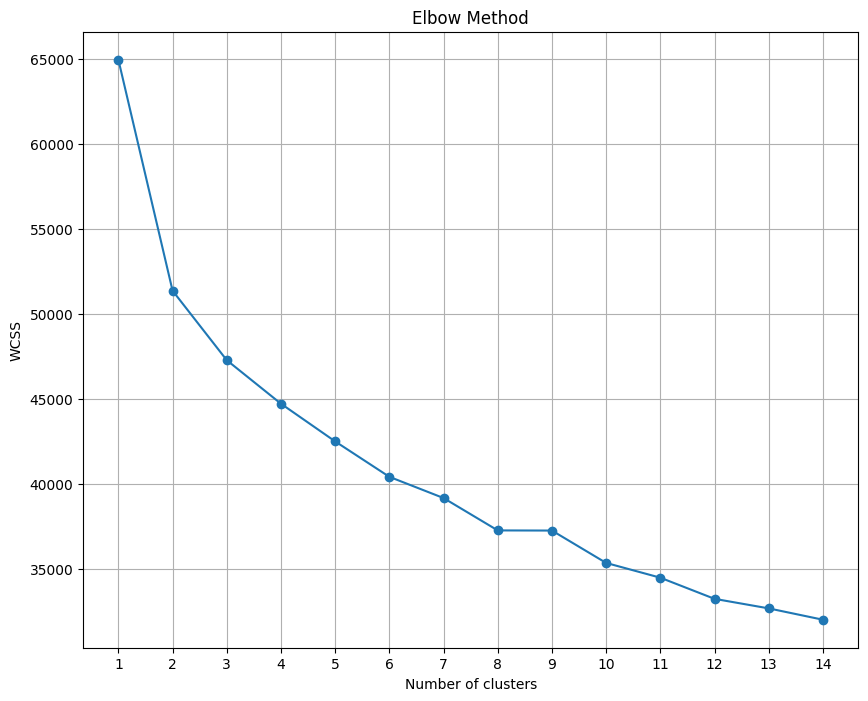

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()


[KMeans(n_clusters=2, n_init=10, random_state=42), KMeans(n_clusters=3, n_init=10, random_state=42), KMeans(n_clusters=4, n_init=10, random_state=42), KMeans(n_clusters=5, n_init=10, random_state=42), KMeans(n_clusters=6, n_init=10, random_state=42), KMeans(n_clusters=7, n_init=10, random_state=42), KMeans(n_init=10, random_state=42), KMeans(n_clusters=9, n_init=10, random_state=42), KMeans(n_clusters=10, n_init=10, random_state=42)]
9


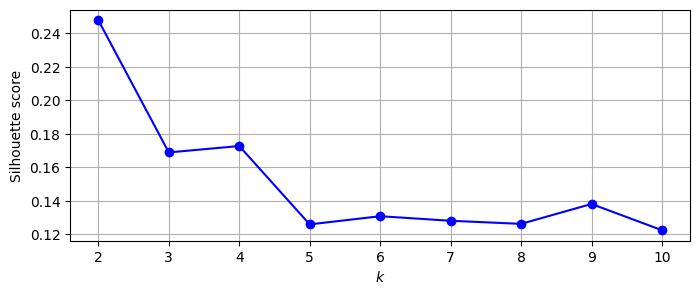

In [41]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df1_reduced)
                for k in range(2, 11)]
# print(kmeans_per_k)

silhouette_scores = [silhouette_score(df1_reduced, model.labels_)
                     for model in kmeans_per_k]
# print(len(silhouette_scores))

plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

In [43]:
cluster_range = range(2, 11)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Silhouette Score for {i} Clusters:", score)

Silhouette Score for 2 Clusters: 0.2477818107715122
Silhouette Score for 3 Clusters: 0.16884605508757253
Silhouette Score for 4 Clusters: 0.17266615375737382
Silhouette Score for 5 Clusters: 0.12588969555365168
Silhouette Score for 6 Clusters: 0.13076186977223944
Silhouette Score for 7 Clusters: 0.1280413788040073
Silhouette Score for 8 Clusters: 0.12619739249473816
Silhouette Score for 9 Clusters: 0.13806937454301285
Silhouette Score for 10 Clusters: 0.12239932783555219


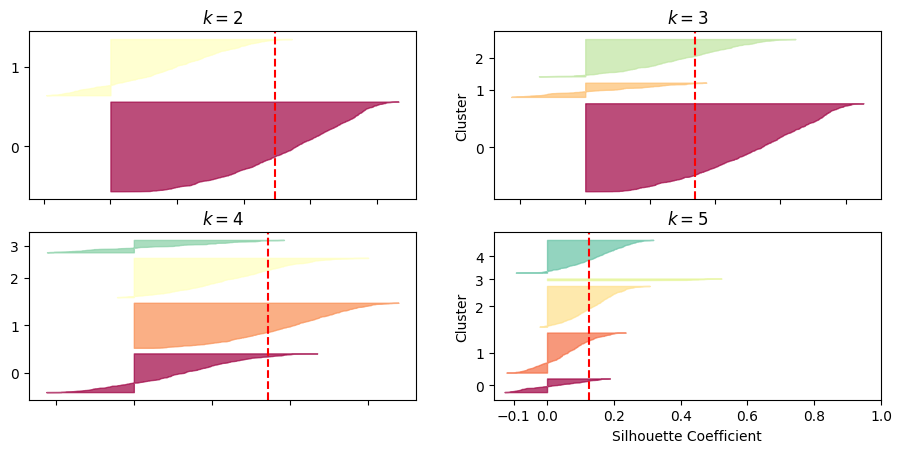

In [44]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df1_reduced, y_pred)

    padding = len(df1_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

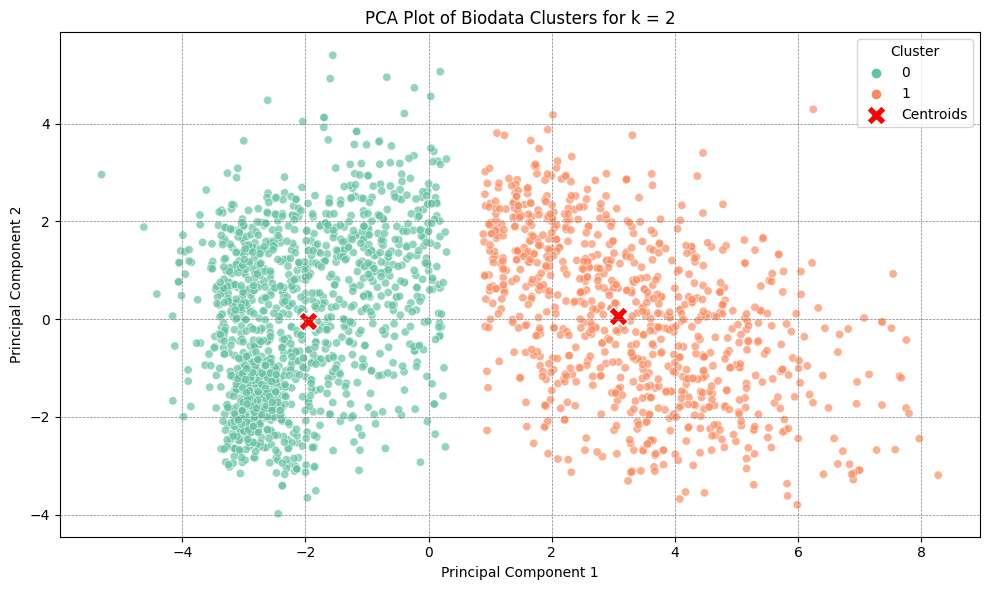

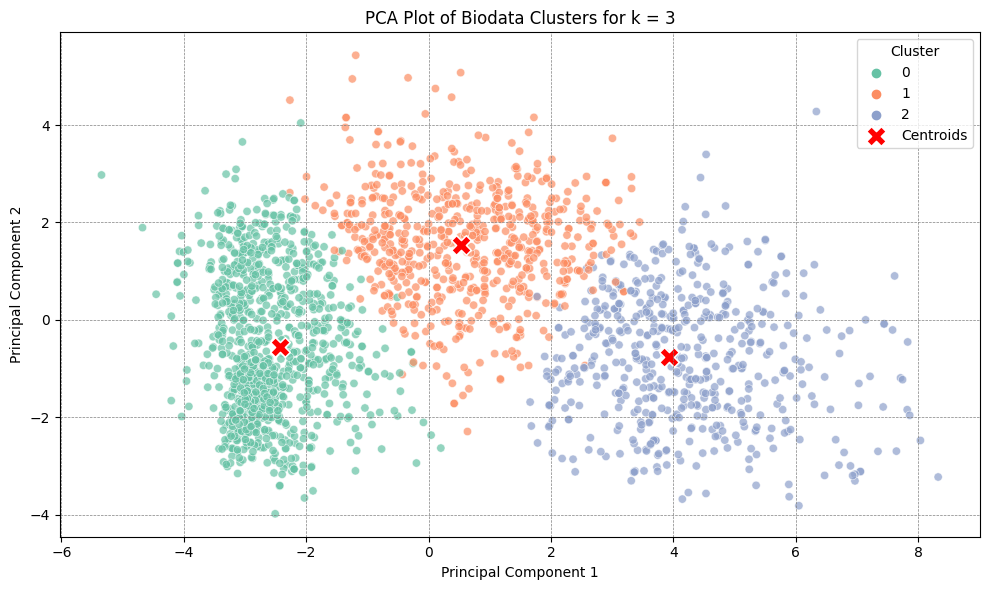

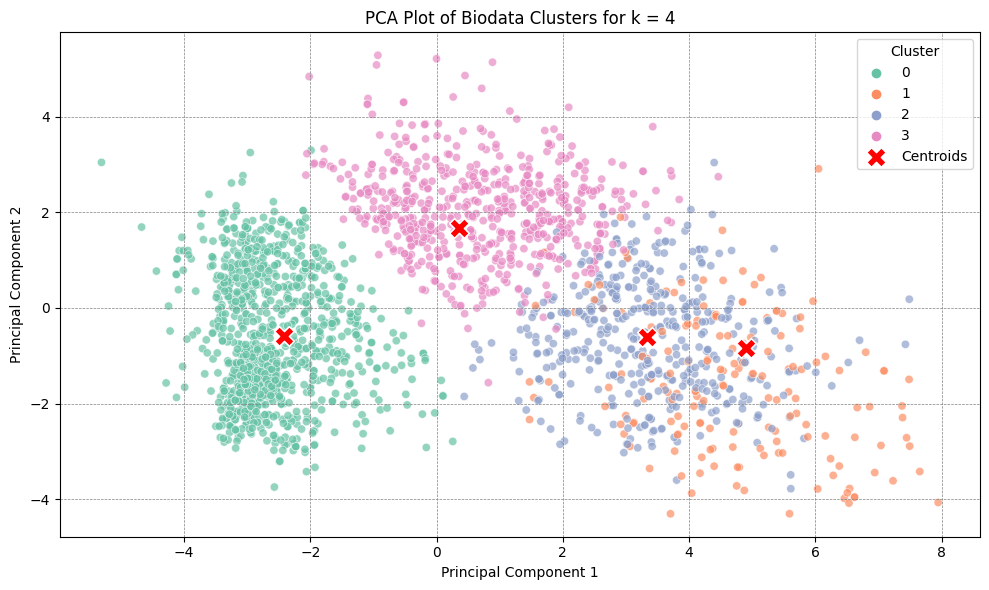

In [45]:
for i in range(2,5):
    kmeans = KMeans(n_clusters= i, random_state=42)  
    cluster_labels = kmeans.fit_predict(df1_reduced)
    df1['Cluster'] = cluster_labels
    df1.to_excel('Clustered_data.xlsx', index = False)


    df2 = pd.read_excel('Clustered_data.xlsx')

    scaler1 = StandardScaler()
    normalized_data = scaler1.fit_transform(df2)

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(normalized_data)

    df2['PC1'] = pca_data[:, 0]
    df2['PC2'] = pca_data[:, 1]


    cluster_palette = sns.color_palette("Set2", n_colors = len(df2['Cluster'].unique()))

    plt.figure(figsize = (10, 6))

    sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

    plt.title(f"PCA Plot of Biodata Clusters for k = {i}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    plt.grid(True)
    plt.tight_layout()


    plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
    plt.legend(title = 'Cluster')


    plt.show()

## Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:

pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(df1_reduced)

hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
h_cluster_labels = hierarchical.fit_predict(pca_data)

df1['H_Cluster'] = h_cluster_labels


In [ ]:
linked = linkage(pca_data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df1['H_Cluster'], palette=sns.color_palette("Set2", n_colors=len(np.unique(h_cluster_labels))), alpha=0.7)
plt.title('PCA Plot of Customer Data with Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()


## Gausian Mixture Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42) 
gmm.fit(df1_reduced)
cluster_labels = gmm.predict(df1_reduced)

df1['GMM_Cluster'] = cluster_labels


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_reduced['col1'], df1_reduced['col2'], c=df1['GMM_Cluster'], cmap='viridis', marker='o', edgecolor='black', s=100, alpha=0.75)
plt.title('Clusters by Gaussian Mixture Model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.legend()

plt.show()
